# Simple Hashing and Collisions

This is a very simple example of hashing based on the modulo function and neglecting the issue of collisions mentioned in the lecture.

## Introduction

Good hashing approaches are available in Python for the *Dictionary* data type. However here is a demonstration of a simple hashing function. The data values have actually been chosen to avoid collisions for the initial size for the hash table. 
In this example the data values are their own keys.

## A simple hash function

In [1]:
data = [8, 17, 27, 30, 55, 56, 57, 60, 1001, 1002]

Some of the values are closely spaced in value. The aim is spread them through the hash table in an apparently random way. 
The hash table is initially loaded with placeholder 'None' values.
The chosen size is 17 for the demo.

In [2]:
hash_table = [None] * 17
tableLength = len(hash_table)

The hash function is the modulo (remainder) of the data value devided by the length of the hash_table.

In [3]:
def hash_function(value, table_size):
    return value % table_size

The data values can now be distributed in the hash_table using the hash_function. 

In [4]:
for value in data:
    hash_table[hash_function(value, tableLength)] = value

Here they are, notice the function has distributed them through the table.

In [5]:
print(hash_table)

[17, None, None, None, 55, 56, 57, None, 8, 60, 27, None, None, 30, None, 1001, 1002]


A value can be retrieved from the table by applying the hash function - but in this case they are their own keys so it does not appear very useful.

In [6]:
print(hash_table[hash_function(27, tableLength)])

27


There is not much space for addtional values in this case without collisions. These occur when the hash_function for a new key is the same as an existing one.
,
One way to minimize collisions is to make a better choice for the hashing function. For example  it might be better to use a large prime number for the modulo function function in preference to the tableLength value *e.g.* for a 1000-slot table use the prime 997. 

A completely functional hash_table would have one of the methods for dealing with a collision. The overhead in dealing with collisions will decrease the hashing performance from its initial O(1). For retrieving data the process is slowed up by the added steps when a slot has been assigned to multiple data values. 

The overhead increases as the *'load factor'* for the hash table increases. The *load factor* (often called $\alpha$) is the proportion of the slots that have values loaded into them. 

So for the demo with initial valuesabove there are 9 data values in 15 slots: so that is a load value of 9/15 or 0.60.

For the simple linear addressing method of dealing with collisions the big O performance of the hashing varies as:

$O$ = 1+(1/(1-$\alpha$)<sup>2</sup>)

(ref. Sedgewick, R. (2003) Linear probing. p615, *Algorthims in Java*, Addison Wesley) 

For low $\alpha$, such as occurs with small numbers of data elements in a large hashing table the O(1) performance will be not degraded by the 1-$\alpha$)<sup>2</sup>) term in this expression.

**To see the form of this expression with increasing $\alpha$ your job is to plot the function as the load factor approaches 1. You should do this with matlibplot. The next section shows you how to plot a function.**


## Plotting a function with matlibplot

This is simple example showing how we can plot the function $y$ = $x$<sup>2</sup> for $x$ in the range 0 to 4:

In [7]:
# This line configures matplotlib to show figures embedded in the notebook
# It uses the IPython inline 'magic' syntax
%matplotlib inline
# standard import
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

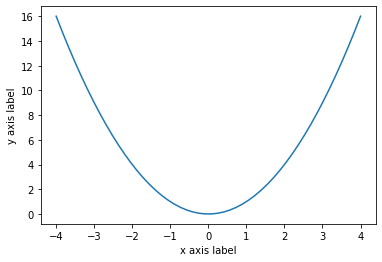

In [8]:
x = np.linspace(start=-4., stop=4.) # Return evenly spaced numbers over a specified interval.
y = x**2
plt.figure()
plt.plot(x,y)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.show()

## Your task
Plot how the $O$ the big O performance of the hashing with the load factor $\alpha$ according to the Sedgewick formulae above.

Consider what is a good range to use for $\alpha$ in the plot and make sure you label the axes.

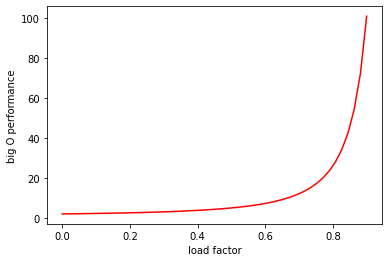

In [10]:
# model answer 
# alpha only meaningful in range 0 to 1. 
# At alpha=1 big O performance becomes infinite
x = np.linspace(start=0., stop=0.9)
y = 1 + 1/(1 - x )**2
plt.figure()
plt.plot(x,y, 'r')
plt.xlabel('load factor')
plt.ylabel('big O performance')
plt.show()

You should notice that the plot shows that linear addressing has a strikingly non-linear loss of performance as the hash table load factor increases. 

However, a small load factor is also an inefficient use of memory space. So as a result, many more sophisticated methods of dealing with collision have been devised which have better performance at higher load factors.